# Pairplot: Visualizing High Dimensional Data

This example provides how to visualize high dimensional data using the pairplot.

In [1]:
import graspologic

import numpy as np
%matplotlib inline

/opt/hostedtoolcache/Python/3.8.14/x64/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Simulate a binary graph using stochastic block model
The 3-block model is defined as below:

\begin{align*}
n &= [50, 50, 50]\\
P &= 
\begin{bmatrix}0.5 & 0.1 & 0.05 \\
0.1 & 0.4 & 0.15 \\
0.05 & 0.15 & 0.3
\end{bmatrix}
\end{align*}

Thus, the first 50 vertices belong to block 1, the second 50 vertices belong to block 2, and the last 50 vertices belong to block 3.

In [2]:
from graspologic.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05], 
     [0.1, 0.4, 0.15], 
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)

## Embed using adjacency spectral embedding to obtain lower dimensional representation of the graph

The embedding dimension is automatically chosen. It should embed to 3 dimensions.

In [3]:
from graspologic.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

print(X.shape)

(150, 3)


## Use pairplot to plot the embedded data

First we generate labels that correspond to blocks. We pass the labels along with the data for pair plot.

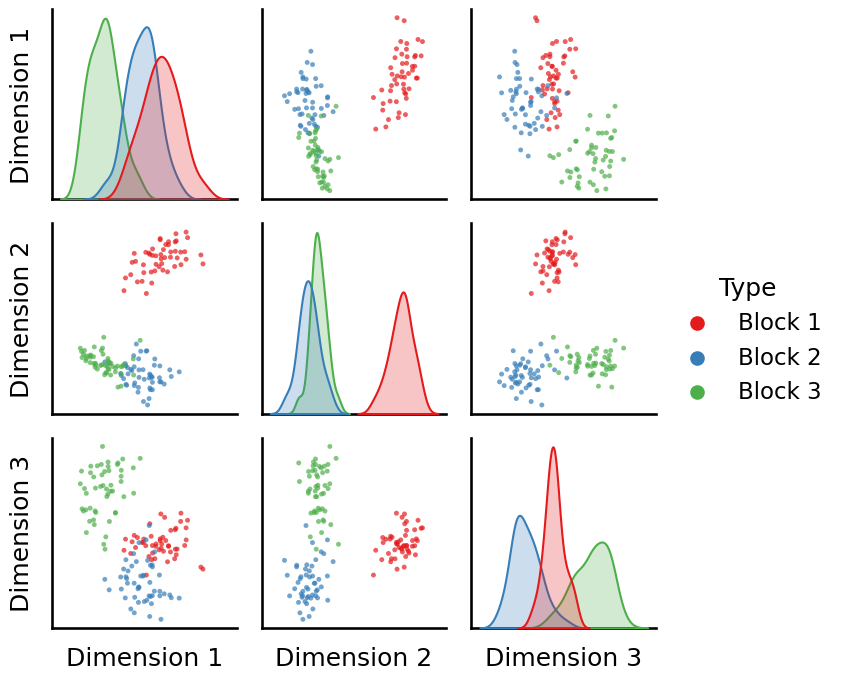

In [4]:
from graspologic.plot import pairplot

labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50

plot = pairplot(X, labels)